In [50]:
import pandas as pd
import os

df = pd.DataFrame()

folder = "groupbuys"
#load every csv in the folder and append them
csv = os.listdir(folder)
for file in csv:
    df = pd.concat([df, pd.read_csv("sorted-preprocessed-data/"+folder+"/"+file)], axis=0)

df = df[["topic","post","start_edit", "last_edit"]]
df["post"] = df["post"].astype(str)
# df = df.sort_values(by=["start_edit"]).reset_index(drop=True)
df = df.reset_index(drop=True)

In [52]:
df

,topic,post,start_edit,last_edit
0,Re: [EU/UK GROUP BUY] Blue Fury USB miner 2.2 ...,before we all get excited about the second bat...,2013-11-02,2013-11-02
1,Re: [EU/UK GROUP BUY] Blue Fury USB miner 2.2 ...,In regards to numbers I think the fabricator ...,2013-11-02,2013-11-02
2,Re: [EU/UK GROUP BUY] Blue Fury USB miner 2.2 ...,"That is a fair point pete. If when I asked, he...",2013-11-02,2013-11-02
3,Re: [EU/UK GROUP BUY] Blue Fury USB miner 2.2 ...,"Jeesh, some of you guys need to chill. Woooos...",2013-11-02,2013-11-02
4,Re: [EU/UK GROUP BUY] Blue Fury USB miner 2.2 ...,It seems perfectly reasonable to me that Beast...,2013-11-02,2013-11-02
...,...,...,...,...
75715,Re: [EU/UK GROUP BUY] Blue Fury USB miner 2.2 ...,before we all get excited about the second bat...,2013-11-02,2013-11-02
75716,"Re: [CLOSED]R5: KnC Jupiter, BELOW-COST+Host! ...","I'm showing ""last update"" by the plugin at 15 ...",2013-11-02,2013-11-02
75717,Re: [EU/UK GROUP BUY] Blue Fury USB miner 2.2 ...,"I can't say, but the rest of outcast order wil...",2013-11-02,2013-11-02
75718,Re: [EU/UK GROUP BUY] Blue Fury USB miner 2.2 ...,before we all get excited about the second bat...,2013-11-02,2013-11-02


In [41]:
# group by topic and append all the strings from the post column
df = df.groupby('topic').agg({'post': '\n--------\n'.join, 'start_edit': 'first', 'last_edit': 'last'}).reset_index()

In [31]:
df = df.sort_values(by=["start_edit"])

In [32]:
df

,topic,post,start_edit,last_edit
302,Re: CANCELLED [Group Buy in China] Avalon ba...,Where do you look for that number ?\n--------\...,2013-03-25,2013-03-26
116,CANCELLED - [Group Buy for Europe] Pooling for...,Closed!,2013-03-25,2013-03-26
117,CANCELLED [Group Buy in China] Avalon batch #3,Do you not have enough BTC to buy a batch 3 Av...,2013-03-25,2013-03-25
120,CLOSED Flash Group Buy While AVALON Still In S...,Miners!!!I am trying planning to buy Avalon mi...,2013-03-25,2013-03-26
315,Re: [Group Buy in China] Avalon batch #3,"Thanks for trusting me,225BTC received! dae51...",2013-03-25,2013-03-25
...,...,...,...,...
730,Re: I am placing an order for bitmain s17 pro ...,APW9+ has been the unicorn mostly but both mod...,2020-09-18,2020-09-18
113,Bulk order splitting - Looking for a few peopl...,So after digging around and finding a reputabl...,2021-10-28,2021-10-28
549,Re: Bulk order splitting - Looking for a few p...,So after digging around and finding a reputabl...,2021-10-29,2022-01-26
57,"Antminer T19 Hydro for 2175$, any interest?",Here's the link: https://shop.bitmain.com/prod...,2022-07-17,2022-07-17


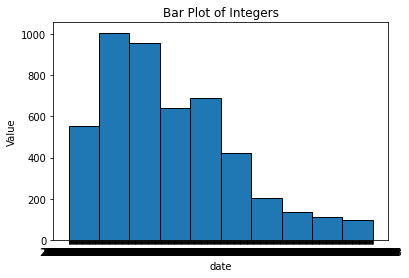

2022-07-23
2013-03-25


In [33]:
import matplotlib.pyplot as plt
plt.hist(df["start_edit"], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('date')
plt.ylabel('Value')
plt.title('Bar Plot of Integers')

# Show the plot
plt.show()

print(df["start_edit"].max())
print(df["start_edit"].min())

In [34]:
#print a sample
for (id,row) in df.sample(10).iterrows():
    print("id: ", id)
    print("topic: ", row["topic"])
    print("date: ", row["start_edit"])
    print(row["post"])
    print("\n\n\n\n\n")

id:  3549
topic:  Re: [Open] Bitfury Bare Chips ~2.6 Gh/s - Reel #3 (896:3,000 Remaining)
date:  2014-01-16
Put me up for 28 pcs, payment comming shortly.I would order more, but not enough BTC.EDIT: Sent payment for 28 pcs.ID: 429e595ca6948fe1e01e5e4e25b72e38f57fef5c6405dfb1acc278f2e14f0ecd
--------
100 more chips for me.Transaction: 1KbT4MkxVDZDQCwMA9kpqCHS9jnEU9MKaMNow I really have to finish my PCB CAD...Thanks!
--------
Any updates?  According to a previous post, Reel 3 open, but the payment deadline has passed.Ditto - I am interested if there is still time.
--------
add 18 more to my order of 32 please.  Sent PM to clarify amount to pay.
--------
I haven't updated the OP since reel 3 should be closed. Dave told me he ordered a couple extra so I could send payment when I have all the BTC together. There are still about 600+ remaining on reel 3, and it is going to be closed very soon.
--------
Payment sent for 100 chips from Reel 3.
--------
when should be possible get chips orderin

In [35]:
print(df.loc[2072]["post"])

Hello,My low post count has me not able put this in thread but I just sent in 9.25btc from 1F1jCDGQFZ5g78YiEX6xati4songvaVa5shttps://blockchain.info/tx/6ed69708467e908a3c9be677f8d227f83fd6e91880d153a2dce98c3f582728f1if you could, update when you can ThanksConfirmed .
--------
Quote from: John (John K.) on April 27, 2013, 08:41:29 AMI have just sent 1 BTCthe transactionid is 46eb6f81d58e245789d05052a6b30e57ef3e65509a9e0c19a4f1376fd9d87951I calculated from the chips that 1 btc is around 12 chips.If there is any spare change from the btc, you may keep the spare change for good service.Okay, will update when I get to PC. Thanks againThank You. If possible, could you PM me when its updated on the spreadsheet?Will do, thanks. Placed in thread.
--------
Quote from: John (John K.) on April 27, 2013, 04:35:23 AMCan anybody tell me what the amount should be for 100 chips with fees and everything? I can't make sense of the spreadsheet. I've sent a couple of messages to the OP, but I'm sure he's s

In [36]:
print(df.loc[3529]["post"])
print(df.loc[2072]["post"])

There are at least 2 other GB around 1.5 BTC for 50 GH/s if we're talking about CoinTerra. The timeline just isn't worth it
--------
Invest now to stay ahead of the curve later.
--------
You *really* called them? I read on the forum about their phone numbers not working or something like that. CoinTerra haven't been really very public with details. I'm putting my trust in KnC for now. They've been quite communicative. I might invest in a GB next month, dependent on circumstances. Yes I called them, twice actually.  It was the same person, so I'm pretty sure that guy might be very busy considering how many millions are being invested in the device.  Have you ever tried calling them?  You might as well at least try if not before speculating that it's impossible to reach them.I didn't get through one or two times because they were probably busy (I called soon after the new $6K deal was offered).
--------
Why should we trust you, your only a member   I am not trying to be rude  ThanksYeah,